# **MARKOV JUMP PROCESS APPLIED TO TRAFFIC FLOW MODELLING**

#### AUTHORS: Hoodaty Soumodeep, Kumar Akshita

### **Jump Process**
A jump process is a random variable $X: (\Omega, A, \mathbb{P}) \rightarrow (\chi, \tau)$, where:
$A$ is a $\sigma$ algebra on $\Omega$ and $\mathbb{P}$ a probability measure on $(\Omega, A)$
The space $\chi$ is the set of functions from $[0,\infty)$ to the countable state space E, which are cadlag, i.e
$$\chi = \{f:[0,\infty) \rightarrow E, \; \lim_{s→t, s<t}f(s) = f(t_{-}), \; \lim_{s→t, s\geq t}f(s) = f(t) \}$$
The $\sigma$ field $\tau$ is the smallest $\sigma$ field of $\chi$ such that $f \in \chi → f(t)$ is measurable for any t $\geq$ 0.


### **Markov Jump Process**
A markov jump process is a jump process that satisfies the Markov property, i.e $\forall 0 \leq t_{0} < \ldots < t_{n}$, $s \geq 0$, $x_{0}, \ldots, x_{n}$, and $y \in E$,
$$\mathbb{P}(X_{t_{n}+s}|X_{t_{n}} = x_{n}, X_{t_{n-1} = x_{n-1}}, ..., X_{t_{0}}=x_{0}) = \mathbb{P}(X_{t_{n}+s}=y|X_{t_{n}} = x_{n}) = \mathbb{P}(X_{s}=y|X_{0} = x_{n})$$


### **Mesanthrope Process**
A mesanthrope process is a jump process describing particles that evolve on a set of sites, and the movement is governed by their aversion to each other, or the tendency to avoid being in close proximity with one another.


### **Description of the Model**

The chosen model is a totally asymmetric misanthrope markov jump process that describes the evolution of the number of vehicles on different sections of a road. The model is based on a mesoscopic approach, which is an intermediate approach between macroscopic and microscopic models that describe the traffic flow dynamics in an aggregate way but represent the individual
driver-vehicle behaviors (i.e vehicles are individually considered like in a microscopic approach but their dynamics are aggregated per section as in a macroscopic one).

In this model, vehicles act as particles and road sections as sites. The maximum number of vehicles per section is denoted as $N \in \mathbb{N}^{*}$. We consider the case where the road has a finite number of sections M, so that the state space $E = \{0,1,,\ldots,N\}^{M}$. A vehicle can jump from one section of the road to the next, with a jump rate that depends on the number of vehicles in both the departure and arrival sections.

The evolution of the system takes place as:
If at a time instant t, $\eta \in E$ represents the state of the system, $x \in \{0,1,\ldots,M\}$ represents the section number and $\eta(x)$ denotes the number of vehicles in section $x$, the probability that a vehicle moves from section x to x+1 during the time interval $[t,t+\delta t]$ id $b_{x}(\eta(x),\eta(x+1) + \epsilon(\delta t)) x \delta t$, where $\lim_{\delta t →0}\epsilon(\delta t)=0$. The times between jumps of a section x have an exponential distribution with parameter $b_{x}(x,x+1)$, where $b_{x}(0,n) = b_{x}(n,N)$ = 0. At every step, the section with the minimum jump time is chosen, a vehicle is transferred from this section to the next, the global time of the system updated with the obtained jump time, and new jump times of modified sections are calculated based on the new jump rates.


#### **Assumptions:**
**1)** The maximum number of vehicles in each section is N. Further, length of each vehicle is assumed to be 1 so that length of a section is considered in terms of the maximum number of vehicles it can hold.

**2)** A vehicle can only jump from one section to the next, and two vehicles cannot jump simultaneously. Vehicles in the last section jump to the previous section.

**3)** Jump times of a section x containing stricly positive number of vehicles follow an exponential distribution with parameter $b_{x}$ which is a function of the number of vehicles in the section of departure (x) and the section of arrival (x+1). It is in fact an increasing function of the former while a decreasing function of the latter.

**4)** If the section with minimum jump time has no vehicles or if the next section contains maximum possible vehicles (that is has no more capacity), we choose the section with the next least jump time and follow the same procedure.

#### **Parameters:**

**1)** Jump rate function $b_{x}$

**2)** Section size $D_{x}$

**3)** Maximum number of vehicles (capacity) of the section $N_{x}$.

For simplicity, we will assume $D_{x}=N_{x}$.

The jump rate, which depends on the number of vehicles in the section of departure and arrival, is defined as a function of supply and demand functions of the current and next section. Every section x applies a pressure on the next section x+1. If $\Delta_{x}$ denotes the demand expressed by section x, and $\Sigma_{x+1}$ denotes the supply expressed by the next section x+1, the jump rate is then defined as:

$$b_{x}(\eta(x),\eta(x+1) = min\left\{\Delta_{x}\left(\frac{\eta(x)}{D_{x}}\right),\Sigma_{x+1}\left(\frac{\eta(x+1)}{D_{x+1}}\right)\right\}$$

where $\Delta_{x}$ and $\Sigma_{x}$ (denoting the demand and supply respectively as expressed by section x) are given as:

$$\Delta_{x}(\rho) = \begin{cases}
  \begin{eqnarray*}
  Q_{x}(\rho) && \text{ if } \rho < \rho_{x}^{cr}\\
  \text{max}_{\rho}Q_{x}(\rho) && \text{ otherwise}
  \end{eqnarray*}
  \end{cases}$$

$$\Sigma_{x}(\rho) = \begin{cases}
  \begin{eqnarray*}
  \text{max}_{\rho}Q_{x}(\rho) && \text{ if } \rho < \rho_{x}^{cr}\\
  Q_{x}(\rho) && \text{ otherwise}
  \end{eqnarray*}
  \end{cases}$$

Here, $Q_{x}(\rho)$ denotes the flow volume as a function of the density $\rho$, and we use its definition from the macroscopic model by Edie and Underwood as:
$$Q_{x}(\rho) = V\rho e^{-\lambda \rho}$$

where $\lambda$ is a qualified parameter of sensitivity, inverse of relaxation time. $\rho_{cr}$ denotes the argmax of the flow volumn $Q_{x}$, and is thus the only critical point of the flow volume. Upon solving $\frac{dQ_{x}}{dt}(\rho) = 0$, we get $\rho^{cr} = \frac{1}{\lambda}$.


## **SIMULATION OF THE PROCESS**

In [ ]:
#importing the required libraries
import numpy as np
import scipy as sc
import random
import scipy.stats as scs
import matplotlib.pyplot as plt
from numpy import zeros, cumsum, arange, append
from numpy.random import poisson, rand, exponential
from matplotlib.pyplot import figure, step, title, legend
from scipy.optimize import minimize
import math
import scipy.linalg as linalg
import sympy as sp

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

First of all, we define a function 'jump' that defines the jump markov process and takes as an input the parameters eta (denoting initial state or initial number of vehicles in each road section), D (denoting length or maximum number of vehicles in each section, since length of each vehicle is assumed to be 1), V (denoting the average speeds of vehicles in each section) and T (denoting the time limit for the process).

In [ ]:
def jump(eta1,D,V,T):
    for elem1, elem2 in zip(eta1,D):
      assert (elem1<=elem2),"Initial number of vehicles in a section cannot be greater than section capacity"
    eta=eta1
    cst=2 #parameter of sensitivity for definition of Q
    rho_cr=1/cst #density threshold for which flow volume Q(rho) is maximal

    def Q(x,rho): #defining the flow volume function
        return V[x]*rho*math.exp(-cst*rho)

    def delta(x,rho): #defining the demand function
        initial_g=0
        if rho<rho_cr:
            return Q(x,rho)
        else:
            result = minimize(lambda y: -Q(x,y), initial_g)
            return -result.fun

    def sigma(x,rho): #defining the supply function
        initial_g=0
        if rho<rho_cr:
            result = minimize(lambda y: -Q(x,y), initial_g)
            return -result.fun
        else:
            return Q(x,rho)

    def b(x): #defining the parameter of the exponential distribution
        if x<len(eta)-1:
            if delta(x+1,eta[x+1]/D[x+1])<=sigma(x,eta[x]/D[x]):
                return delta(x+1,eta[x+1]/D[x+1])
            else:
                return sigma(x,eta[x]/D[x])
        else:
            if delta(x-1,eta[x-1]/D[x-1])<=sigma(x,eta[x]/D[x]):
                return delta(x-1,eta[x-1]/D[x-1])
            else:
                return sigma(x,eta[x]/D[x])

    lst=[] #list to store states after each iteration
    cumtime = []#list to store the time increment arrays
    gtime = 0 #variable to store global time of the system
    T_n=np.zeros(len(eta)) #empty array to store jump times
    ar=[] #empty array to store jump time increments
    iterations = 0
    max_it=1000
    while(gtime<=T and iterations<=max_it):
        times=[]
        #generating jump time increments for all sections using random exponential distribution
        for i in range(len(eta)):
            if b(i)>0:
                times.append(np.random.exponential(1/b(i)))
            if b(i)<=0:
                times.append(0)
        ar.append(times)
        np.array(ar)
        T_n=np.sum(np.array(ar),axis=0)
        lT_n = list(T_n)
        lst.append(eta.copy())
        idx=np.argmin(T_n) #selecting the state with the minimum jump time
        gtime += lT_n[idx] #updating global time of system with the jump time of selected section
        #updating the state eta
        if idx<len(eta)-1: #if the section with minimum jump time is not the last section
            if eta[idx]>0 and eta[idx+1]<D[idx+1]: #checking if selected section has >0 vehicles and if next section has capacity
              eta[idx]=eta[idx]-1
              eta[idx+1]=eta[idx+1]+1
            elif eta[idx]==0: #if selected section has no vehicles choose another section with the next least jump time
              tm=sorted(T_n)
              for i in range (1,len(lT_n)):
                smin = tm[i]
                if eta[lT_n.index(smin)] == 0:
                  continue
                else:
                  if lT_n.index(smin)<len(eta)-1 and  eta[lT_n.index(smin)+1]<D[lT_n.index(smin)+1]:
                    eta[lT_n.index(smin)]=eta[lT_n.index(smin)]-1
                    eta[lT_n.index(smin)+1]=eta[lT_n.index(smin)+1]+1
                    break
                  elif lT_n.index(smin)==len(eta)-1 and  eta[lT_n.index(smin)-1]<D[lT_n.index(smin)-1]:
                    eta[lT_n.index(smin)]=eta[lT_n.index(smin)]-1
                    eta[lT_n.index(smin)-1]=eta[lT_n.index(smin)-1]+1
                    break

        else: #if the section with minimum jump time is the last section
            if eta[idx]>0 and eta[idx-1]<D[idx-1]:
                eta[idx]=eta[idx]-1
                eta[idx-1]=eta[idx-1]+1
            elif eta[idx]==0:
              tm=sorted(T_n)
              for i in range (1,len(eta)):
                smin = tm[i]
                if eta[lT_n.index(smin)] == 0:
                  continue
                elif eta[lT_n.index(smin)]>0 and eta[lT_n.index(smin)+1]<D[lT_n.index(smin)+1]:
                   eta[lT_n.index(smin)]=eta[lT_n.index(smin)]-1
                   eta[lT_n.index(smin)+1]=eta[lT_n.index(smin)+1]+1
                   break

        cumtime.append(np.cumsum(ar,axis=0))
        iterations+=1
    lst.append(eta.copy())

    return lst, cumtime

Now that we have defined our jump process, we try to simulate it using different values of initial state eta, the list D containing lengths (or vehicle capacities) of sections, the average speeds of vehicles in each section contained in the list V.

In [ ]:
eta = np.array([10,6,9,6,8,4,5,8,1,7]) #initial state of the process for a road with 10 sections, eta represents the
#array denoting initial number of vehicles on each of the 10 sections
D = np.array([10,10,10,10,10,10,10,10,10,10]) #array representing length of each section, assumed to be equal to the
#maximum number of vehicles on each section
V = [20,30,30,69,34,56,23,48,89,17] #array representing average speed of vehicles on each of the 10 sections
T = 50
states,times = jump(eta,D,V,T)

We observe the evolution of the number of vehicles on each section by means of subplots for each section.

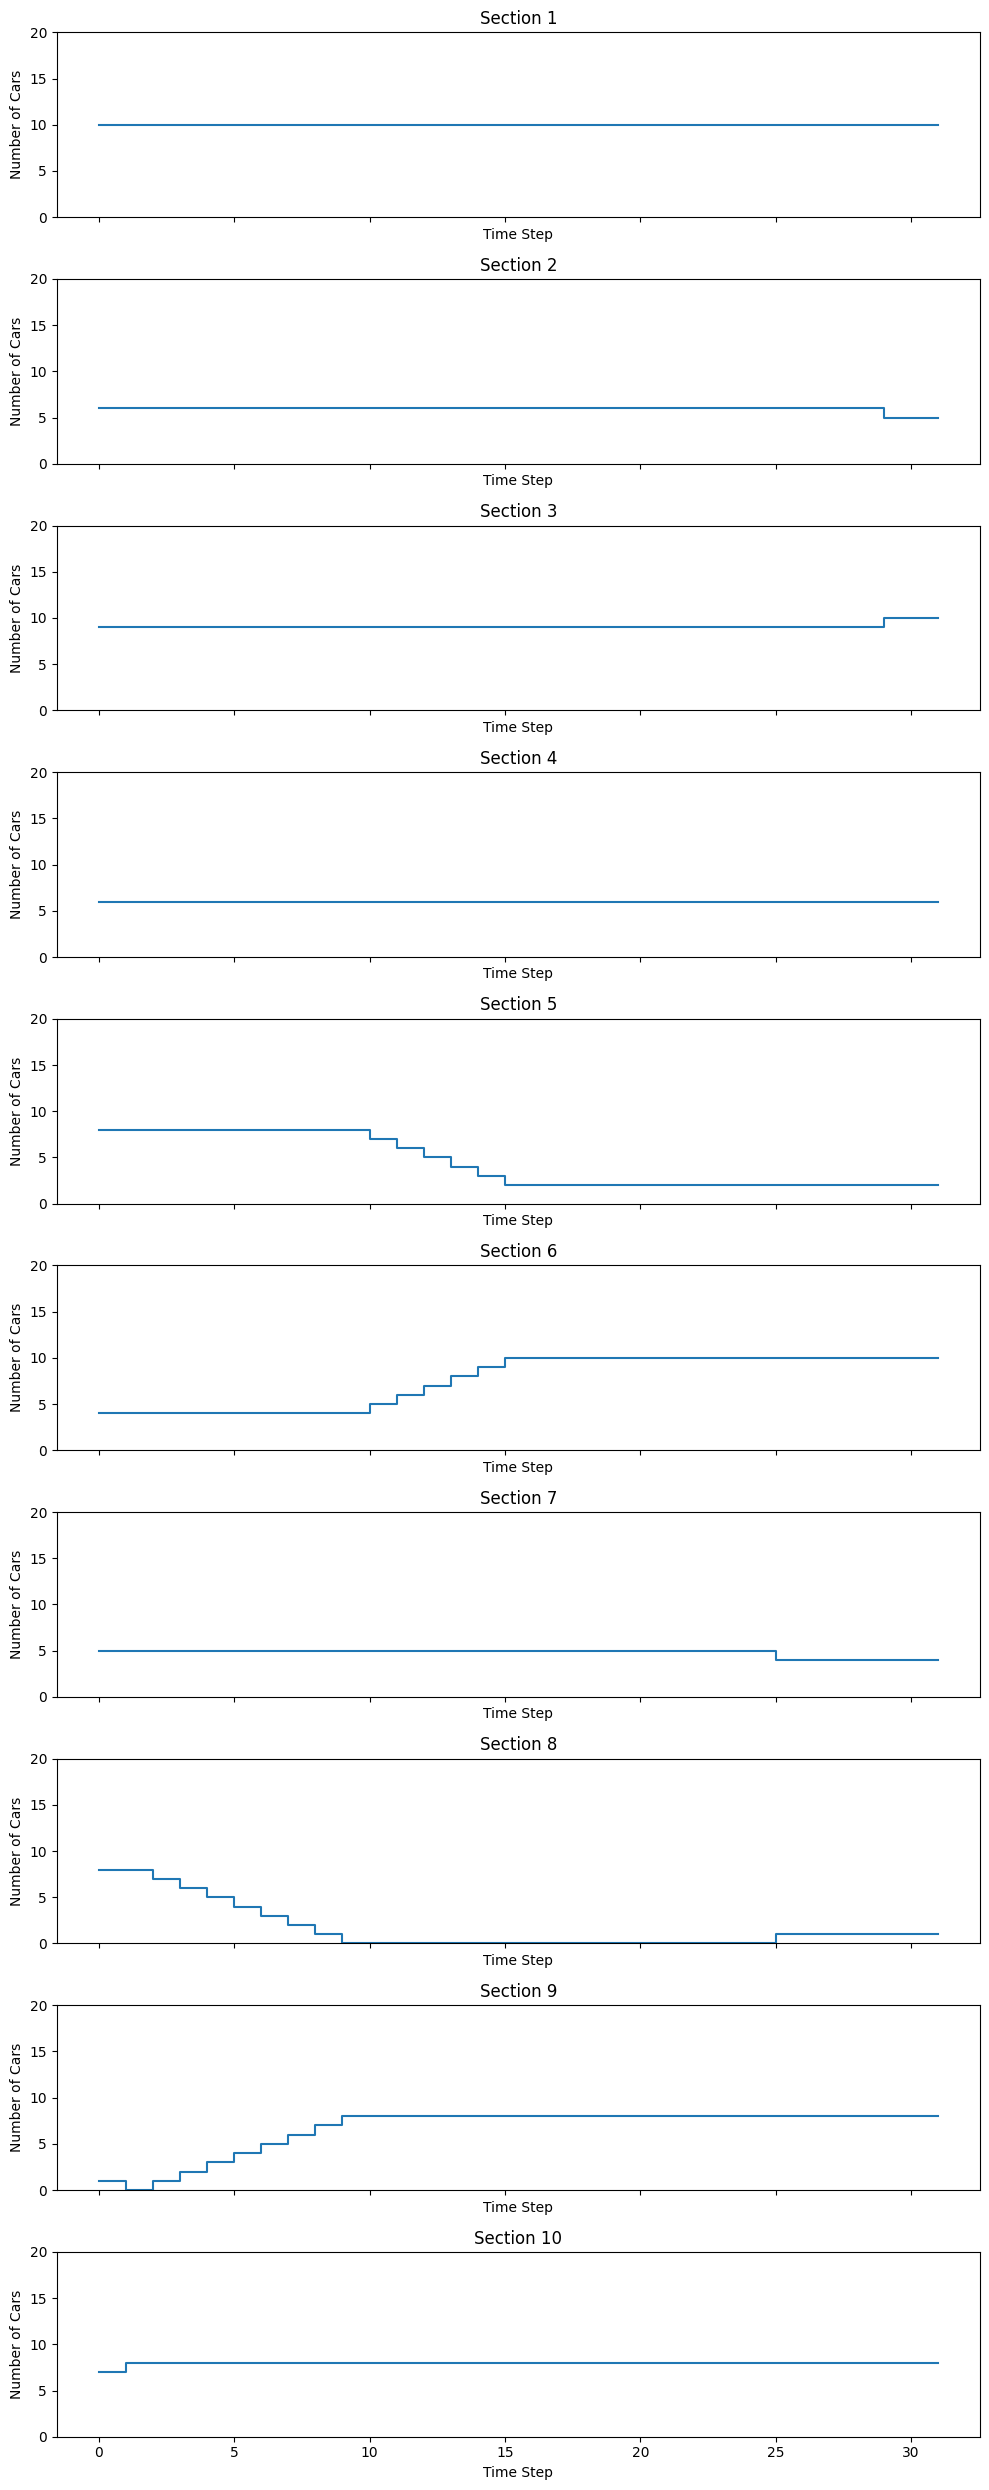

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create x-axis values (time steps)
x = range(len(states))

# Concatenate values for each section
concatenated_states = np.array([np.array([state[i] for state in states]) for i in range(len(states[0]))])
# Plot each section in a separate subplot
num_sections = len(states[0])
fig, axs = plt.subplots(num_sections, 1, figsize=(10, 25), sharex=True)

for i, section in enumerate(concatenated_states):
    axs[i].step(x, section, where='post')
    axs[i].set_ylabel('Number of Cars')
    axs[i].set_title(f'Section {i+1}')
    axs[i].set_xlabel('Time Step')  # Set x-label for each subplot
    axs[i].set_ylim(0, 20)

plt.tight_layout()
plt.show()

We observe from the simulation that while some sections observe a lot of changes in the number of vehicles over the chosen time duration, some others do not change at all from the initial states. The observed behavior changes as the values of eta, D and V are changed as these influence the values of the flow volume function and consequently the demand and supply functions and hence the function for parameter of the exponential distribution.

## Particular Case: Road Containing Three Sections

We now limit ourselves to the analysis of the case where the road contains 3 sections.

We try to find the expected number of cars in each section using Monte-Carlo approximation.

###**Monte Carlo Approximation**
The Monte-Carlo approach to approximate the expectation of a random variable involves the usage of the law of large numbers. The law of large numbers states that if we have a sequence of n independent and identically distributed random variables $(X_{n})_{n \geq 0}$, then the empirical average of these iid random variables converges almost surely as $n → \infty$ to $\mathbb{E}(X_{1})$, i.e.,

$$\frac{\sum_{i=1}^{n}X_{i}}{n} \xrightarrow{n \to \infty} \mathbb{E}(X_{1}) \quad \text{a.s.}$$.

So, we simulate n independent paths of our process $(\eta_{t})_{t\geq 0}$ for large n (representing number of simulations) and compute the empirical average of the obtained values of the process at some time instant t. For large n, this approximates the expectation of the number of vehicles in each section, i.e gives us an approximation of $\mathbb{E}(\eta_{t})$.

In [ ]:
eta = np.array([10,6,3]) #list representing initial number of vehicles on each of the three sections
D = np.array([10,10,10]) # list representing length (or max number of vehicles) of each section
V = [20,30,69] # list representing average speeds of vehicles on each section
T = 50 #global time value
states,times = jump(eta,D,V,T)

In [ ]:
def monte_carlo_expectation(eta, D, V, T, num_simulations):
    final_states = []
    for _ in range(num_simulations):
        states,times = jump(eta, D, V, T)
        final_state=states[-1]  # Get the final state of the jump process
        final_states.append(final_state)
    # Calculating the average final state
    avg_final_state = np.mean(final_states, axis=0)
    return avg_final_state

In [ ]:
monte_carlo_expectation(eta,D,V,T,500)

array([0.266, 9.732, 9.002])

##Infinitesimal Generator $A$ and Matrix of Transition Probabilities $P_{t}$

The **infinitesimal generator** of the process is defined as the matrix of transition rates, and can be expressed as
$$Af(\eta) = \sum_{x=1}^{M}b_{x}(\eta(x),\eta(x+1))[f(\eta^{x})-f(\eta)]$$ for all bounded functions $f$, where $\eta$ denotes the current state and $\eta^{x}$ denotes the next state, i.e

$$\begin{eqnarray*}
\eta^{x}(z) && = && \eta(z), && \text{if} && z\neq x,x+1\\
\eta^{x}(x) && = && \eta(x)-1 \\
\eta^{x}(x+1) && = && \eta(x)+1
\end{eqnarray*}$$


The elements of the infinitesimal generator matrix $A$ represent the rates of transition from one section to the other if that is possible, taking into considerations all of the necessary assumptions. We now describe the construction of $A$ for 3 sections.

Let $\eta = (i,j,k)$ denote the current state, i.e section 1 contains i vehicles initially, section 2 contains j and section 3 contains k vehicles. There are 3 possibilities that we need to consider all of them greater than or equal to 0 and less than or equal to the maximum number of vehicles possible in each section:

**1)** The minimum jump time is for section 1, and the next state $\eta^{x}$ has $[i-1,j+1,k]$ vehicles section-wise, given that $j+1$ is less than or equal to the maximum capacity in the second section.

**2)** The minimum jump time is for section 2, and the next state $\eta^{x}$ has $[i,j-1,k+1]$ vehicles section-wise, given that $k+1$ is less than or equal to the maximum capacity in the third section.

**3)** The minimum jump time is for section 3, and the next state $\eta^{x}$ has $[i,j+1,k-1]$ vehicles section-wise, given that $j+1$ is less than or equal to the maximum capacity in the second section.

For simplicity and faster computations, we take D=2, i.e the maximum number of vehicles in each of the sections is 2. We have generated the state space which contains 27 elements, since each of the three sections can contain 0,1 or 2 elements.

In this case, for any $x, \eta = [i\hspace{0.3cm}j\hspace{0.3cm}k]$.


$$A_{\eta \eta^{x}} = \begin{cases}
b_{0}(\eta(0),\eta(1)); \; \eta^{x} = [i-1\hspace{0.3cm}j+1\hspace{0.3cm}k]\\
\\
b_{1}(\eta(1),\eta(2)); \; \eta^{x} = [i\hspace{0.3cm}j-1\hspace{0.3cm}k+1]\\
\\
b_{2}(\eta(2),\eta(1)); \; \eta^{x} = [i\hspace{0.3cm}j+1\hspace{0.3cm}k-1] \\
\\
- \sum_{j=1, j \neq i}^{27}A_{ij}; \; \eta^{x} = [i\hspace{0.3cm}j\hspace{0.3cm}k]\\
\\
0; \; \text{otherwise}
\end{cases}
$$

The diagonal elements of $A$ are generated such that $A$ follows the property of the infinitesimal generator that the elements in each row sum up to 0, i.e the diagonal elements are negative of the sum of the elements over the non-diagonal elements.

In [ ]:
# redefining the flow volume, demand, supply and transition rate functions to be accessed outside the jump process function

cst=2
rho_cr=1/cst #critical threshold for vehicle density

def Q(x,rho): #defining the flow volume function
    return V[x]*rho*math.exp(-cst*rho)

def delta(x,rho): #defining the demand function
    initial_g=0
    if rho<rho_cr:
        return Q(x,rho)
    else:
        result = minimize(lambda y: -Q(x,y), initial_g)
        return -result.fun
def sigma(x,rho): #defining the supply function
    initial_g=0
    if rho<rho_cr:
        result = minimize(lambda y: -Q(x,y), initial_g)
        return -result.fun
    else:
        return Q(x,rho)

def b(x,eta): #defining the parameter of the exponential distribution
        if x<len(eta)-1:
            if delta(x+1,eta[x+1]/D[x+1])<=sigma(x,eta[x]/D[x]):
                return delta(x+1,eta[x+1]/D[x+1])
            else:
                return sigma(x,eta[x]/D[x])
        else:
            if delta(x-1,eta[x-1]/D[x-1])<=sigma(x,eta[x]/D[x]):
                return delta(x-1,eta[x-1]/D[x-1])
            else:
                return sigma(x,eta[x]/D[x])

We now define the infinitesimal generator matrix according to the definition above, based on the transition rates from one state to another over the whole state space of 27 states. The resulting matrix has a dimension of 27x27.


In [ ]:
#Defining the transition matrix
D=[2,2,2]
state_space = [(i,j,k) for i in range(3) for j in range(3) for k in range(3)]#generating the state space
generator = np.zeros((len(state_space),len(state_space)))#initialising the generator matrix
for p in range(1,len(state_space)):
  s = 0
  for q in range (0,len(state_space)):
    if (state_space[q][0] == state_space[p][0]-1) and (state_space[q][1] == state_space[p][1]+1) and (state_space[q][2] == state_space[p][2]): #(i-1,j+1,k)
      generator[p,q] = b(0,state_space[p])
      s += generator[p,q]
    if (state_space[q][0] == state_space[p][0]) and (state_space[q][1] == state_space[p][1]-1) and (state_space[q][2] == state_space[p][2]+1): #(i,j-1,k+1)
      generator[p,q] = b(1,state_space[p])
      s += generator[p,q]
    if (state_space[q][0] == state_space[p][0]) and (state_space[q][1] == state_space[p][1]+1) and (state_space[q][2] == state_space[p][2]-1): #(i,j+1,k-1)
      generator[p,q] = b(2,state_space[p])
      s += generator[p,q]
  generator[p,p] = -s

In [ ]:
print("The infinitesimal generator A is\n",generator)

The infinitesimal generator A is
 [[  0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.        ]
 [  0.          -0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.        ]
 [  0.           0.          -0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.    

The zero rows in this matrix are due to the transition rate $b_{x}(\eta(x),\eta(x+1))$ taking value 0 for some values of $x$ and $\eta$. This is often due to the supply or demand functions $\Sigma_{x}$ and $\Delta_{x}$ taking the values 0 here.

Next, we wish to define the matrix of transition probabilities $P_{t}$.

---

**Theorem**

Let $u(t) = (\mathbb{P}(\eta_{t}=p))_{p \in E}$. Then $u(t)$ satisfies the differential equation $u'(t) = u(t)A$, where $A$ is the infinitesimal generator such that $A_{xy} = \lambda(x)P(x,y)$ if $y \neq x$ and $A_{xx} = -\lambda(x)$.

---
**Corollary**

$\forall t \geq 0$,
$$u(t) = u(0)e^{At}$$
Hence $\forall t \geq 0, \forall j \geq 0$,
$$\mathbb{P}(X_{t}=j) = \sum_{i \in E}^{} \mu_{0}(i) (e^{At})_{ij}$$
which means
$$\mathbb{P}(X_{t}=j|X_{0}=i) = P_{t}(i,j) = \mu_{0}(i) (e^{At})_{ij}$$
where $\mu_{0}$ denotes the initial distribution of the process

---

We define a function to compute the matrix exponential $e^A$, acting on a vector $x$, using a series expansion and recursion for convergence. Then we utilise that function to generate the value of $e^{tA}$ for any given $t$.

In [ ]:
def exp(A, x):

    Ax = A * x
    if np.max(np.absolute(Ax)) > 1e-4:
        sqrt = exp(A, x / 2) # Recursively call exp with A and x divided by 2
        return sqrt @ sqrt
    sq = Ax @ Ax
    return np.eye(A.shape[0], dtype=np.float128) + Ax + sq / 2 + sq @ Ax / 6 # Return the exponential approximation using the Taylor series expansion

exptA = exp(generator,2)

In [ ]:
print(exptA)

[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00

We can multiply the entries of the obtained matrix exponential above with $\mu_{0}(i)$ (where i denotes the initial state) to obtain the transition matrix $P_{t}$.

## **Special Case: Single Section With Open Boundaries**

We now limit ourselves to the analysis of a single section with open boundaries, containing n vehicles and having an entry rate of $\lambda(n)$ and an exit rate of $\mu(n)$. We denote the markov jump process defining the number of vehicles in this section at any instant $t \in \mathbb{R}^{+}$ by $\eta_{t}$, and the maximum number of vehicles (capacity) of this section by N. We define the entry and exit rates for the section respectively as:
$$\lambda(n)=\text{min}\left\{\alpha,\Sigma\left(\frac{n}{D}\right)\right\}$$
$$\mu(n) = \text{min}\left\{\Delta\left(\frac{n}{D}\right),\beta\right\}$$


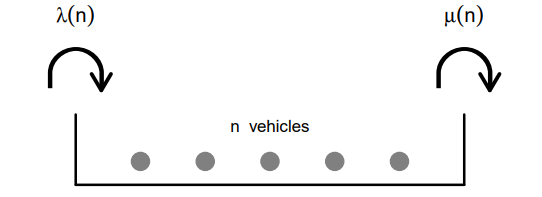


###**Assumptions:**
**1)** We take $\alpha$ to be the maximal fow volume of the section.(upstream demand)

**2)** We take $\beta$ to be the mean flow volume of the section.(downstream supply)

**3)** $\Delta$ and $\Sigma$ represent the demand and supply of the section as defined earlier.

**CLAIM**: The markov process is irreducible since for all states x and y, $\mathbb{P}(\eta_{t}=y|\eta_{0}=x) = P_{t}(x,y) > 0 $ for some $t>0$.


**PROOF:** Let $\eta_{0} = x \in E$.

We want to prove that $\forall y \in E$ such that $y \neq x$ and $0 \leq y \leq D$, where $D$ denotes the maximum capacity of the section (in terms of number of vehicles),
$$\mathbb{P}(\eta_{t}=y|\eta_{0}=x)>0 \text{ for some } t>0$$
We take $y \neq x$ since this is a markov jump process and jumps can only happen to some state different from the current one.

*Case 1:* $y>x$

To show:
$$\exists t>0 \text{ such that } \mathbb{P}(\eta_{t}=y|\eta_{0}=x)>0$$

We claim that this holds for $t = T_{y-x}$.

$$\mathbb{P}(\eta_{T_{y-x}}=y|\eta_{0}=x) > \mathbb{P}(\eta_{T_{y-x}}=y|\eta_{T_{y-x-1}}=y-1, \ldots, \eta_{0}=x) \mathbb{P}(\eta_{T_{y-x-1}}=y-1|\eta_{T_{y-x-2}}=y-2,\ldots,\eta_{0}=x) \ldots \mathbb{P}(\eta_{T_{1}}=x+1|\eta_{0}=x) > 0$$

Using the Markov property,

$$ = \mathbb{P}(\eta_{T_{y-x}}=y|\eta_{T_{y-x-1}}=y-1) \mathbb{P}(\eta_{T_{y-x-1}}=y-1|\eta_{T_{y-x-2}}=y-2) \ldots \mathbb{P}(\eta_{T_{1}}=x+1|\eta_{0}=x) ⟶ (*)$$

The last inequality follows since $\forall x \in E$,
$$\mathbb{P}(\eta_{T_{1}}=x+1|\eta_{0}=x) = \mathbb{P}(T_{1}-T_{0}<Y_{1})=\mathbb{P}(X_{1}<Y_{1}) ⟶ (**)$$

where $X_{1}=T_{1}-T_{0}$ denotes the first arrival time (first jump time increment) following $Exp(\lambda)$ and $Y_{1}$ denotes the first departure time following $Exp(\mu)$.

The last equality in $(**)$ is true as when we are going from $x$ to $x+1$ in only one jump, then the interarrival time would be surely less than the first time to depart (since then the cars in the system would reduce by 1), i.e., the interarrival time is less than the departure time of the first car. But the interarrival time between the first two jumps would be $T_1-T_0$ and the first departure time would be $Y_1$.

Also, we know that

$$\mathbb{P}(X_{1}< Y_{1}) = \int_{0}^{\infty}\int_{0}^{y}\lambda e^{-\lambda x}\mu e^{-\mu y}dx dy = \frac{\lambda}{\lambda+\mu} > 0$$

Again, using the Markov property, each of the terms in $(*)$ is greater than 0 and so, $\mathbb{P}(\eta_{T_{y-x}}=y|\eta_{0}=x) > 0$.



*Case 2:* $y<x$

This can be handled similarly, using the fact that,

$$\mathbb{P}(Y_{1}< X_{1}) = \int_{0}^{\infty}\int_{0}^{x}\lambda e^{-\lambda x}\mu e^{-\mu y}dx dy = \frac{\mu}{\lambda+\mu} > 0$$

We have hence proved that the Markov process is irreducible.

Moreover, since the state space $E = \{0,1,\ldots,N\}$ is finite, the markov process is positive recurrent and hence admits a unique stationary probability $m$.

From the definition of ergodic behaviour as done in class, we know that:


---


***Theorem:***
There exists $C, \lambda >0$ such that $\forall t \geq 0 $ and any initial condition $\eta_{0}$, the following holds:
$$\sum_{y \in E}\vert \mathbb{P}(\eta_{t}=y \vert \eta_{0}=x)- m(y)   \vert \leq Ce^{-\lambda t}$$


---


As t $→ \infty$ the error term $Ce^{-\lambda t}$ goes to $0$ and hence we have,

$$m(n) = \lim_{{t \to \infty}}\mathbb{P}_{x}({\eta_{t} = n})\hspace{1cm}∀ 0 \leq n \leq D$$

The distribution is reversible for the process. One has:

---


***Definition:***

A distribution $\pi_{i}$ is said to be reversible if $\forall i,j \in E$,
$$\pi_i q_{ij} = \pi_j q_{ji}$$

Where $q_{ij}$ represents the transition rate from state *i* to state *j* in one unit of time.



---
 For our process, the distribution m is reversible. Hence, we have:

$$m(n-1)λ(n-1) = m(n)μ(n) \hspace{1cm} ∀ n = 1, . . . , D$$


One obtains : $$m(n) = m(0)\prod_{i=1}^{n} \frac{\lambda(i-1)}{\mu(i)}\hspace{1cm} ∀1\leq n\leq D$$

 with $$m(0) = \frac{1}{1+\sum_{n=1}^{N}\prod_{i=1}^{n}\frac{\lambda(i-1)}{\mu(i)}}$$

A is the generator matrix given by:

$$A = \begin{bmatrix}
-\lambda(0) & \lambda(0) & 0\\
\mu(1) & -\lambda(1)-\mu(1) & \lambda(1)\\
0 & \mu(2) & -\mu(2)
\end{bmatrix}$$

The columns and rows in this matrix represent the state space(number of cars possible in the section). We take one row at a time and calculate the elements corresponding to that row for every column by calculating the entry or exit rate for the transition from the state in the row to that of the column. The diagonal elements are taken as the negative sum of the rest of the elements in the row, by the usual definition of a generator matrix.


Let us consider, $$m = [m(1)\hspace{0.3cm}m(2)\hspace{0.3cm}m(3)]$$

---


***Theorem:***
Let $m$ be the stationary distribution and $A$ be the generator matrix of a continuous-time Markov process. Then,

$$mA=0$$

$0$ represents the zero matrix.

---

We calculate the value of $m$ using the equation $mA=0$, as follows:

$$\begin{bmatrix}
m(1) & m(2) & m(3)\\
\end{bmatrix}
\begin{bmatrix}
-\lambda(0) & \lambda(0) & 0\\
\mu(1) & -\lambda(1)-\mu(1) & \lambda(1)\\
0 & \mu(2) & -\mu(2)
\end{bmatrix}=0$$

We observe that $A$ does not contain the values $\lambda(2)$ and $\mu(0)$.

From this we get three equations:

$$-\lambda(0)m(1) + \mu(1)m(2) = 0 ⟶(I)$$

$$\lambda(0)m(1) + (-\lambda(1)-\mu(1))m(2) + \mu(2)m(3) = 0⟶(II)$$

$$\lambda(1)m(2) - \mu(2)m(3) = 0⟶(III)$$

Solving these, we get the following values:
$$m(1) = \frac{\mu(1)}{\lambda(0)\left( 1 + \frac{\lambda(1)}{\mu(2)} + \frac{\mu(1)}{\lambda(0)}  \right)}$$

$$m(2) = \frac{1}{1 + \frac{\lambda(1)}{\mu(2)} + \frac{\mu(1)}{\lambda(0)}}$$

$$m(3) = \frac{\lambda(1)}{\mu(2)\left( 1 + \frac{\lambda(1)}{\mu(2)} + \frac{\mu(1)}{\lambda(0)}\right )}$$

Using the following initial conditions we can estimate the value of $m$.

We consider:


*   $D$(maximum number of cars in the section) = $2$

*   $\eta_0$(initial number of cars in the section) $=1$

*   $T $(maximum global time) $= 50$

*   $\alpha = Q(\rho_{cr})$ (maximal flow volume)

*   $\beta = Q(\rho_{cr})/2$ (mean flow volume)

*   $n = 0,1,2$

From these values we get:

* $\lambda(1) = 1.83939$

* $\lambda(0) = 1.83939$

* $\mu(1) = 0.91969$

* $\mu(2) = 0.91969$


We have seen that the infinitesimal generator $A$ of this process contains only the values $\lambda(0)$, $\lambda(1)$, $\mu(0)$ and $\mu(1)$. From above we observe that in our case, $\lambda(1) = \lambda(0)$ and $\mu(1) = \mu(2)$. Hence, we can take the entry and departure rates to be constant equal to $\alpha$ and $\beta$ respectively.


Substituting the values of $\lambda(0), \lambda(1), \mu(0), \mu(1)$ in the obtained values of m above, we get

$$m(0) = 0.14285$$
$$m(1) = 0.2857$$
$$m(2) = 0.5714$$

$\therefore$ $$m = [0.14285 \hspace{0.3cm} 0.2857 \hspace{0.3cm} 0.5714]$$

---


We now try to define a function m for the stationary probability that takes as parameters n and D, that is the maximum number of vehicles that can be accommodated in the section. To do so, we use the formula as defined previously:
$$m(n) = m(0)\prod_{i=1}^{n} \frac{\lambda(i-1)}{\mu(i)}\hspace{1cm} ∀1\leq n\leq 2$$

In [ ]:
#Defining the flow volume, demand, supply and transition rate functions for this case of a single section of the road.

cst=2 #parameter of sensitivity for definition of Q
rho_cr=1/cst #density threshold for which flow volume Q(rho) is maximal
V=10

def Q(rho): #defining the flow volume function
        return V*rho*math.exp(-cst*rho)

def delta(rho): #defining the demand function
        initial_g=0
        if rho<rho_cr:
            return Q(rho)
        else:
            result = minimize(lambda y: -Q(y), initial_g)
            return -result.fun
def sigma(rho): #defining the supply function
        initial_g=0
        if rho<rho_cr:
            result = minimize(lambda y: -Q(y), initial_g)
            return -result.fun
        else:
            return Q(rho)

In [ ]:
def m(n,D):#definition of the stationary distribution
  alpha = Q(rho_cr)
  beta = Q(rho_cr)/2
  m_0 = 0
  for i in range(1,D+1):
    product = 1
    for j in range (1,i+1):
      l = np.min([alpha,sigma((j-1)/D)])#lambda
      m = np.min([beta,delta(j/D)])#mu
      product = product*(l/m)
    m_0+=product
  m_n = 1/(1+m_0)#definition fo m(0), initialising m(n)
  for i in range(1,n+1):
    l = np.min([alpha,sigma((i-1)/D)])
    m = np.min([beta,delta(i/D)])
    m_n = m_n*(l/m)
  return m_n

We compute the values of $m$, for $n = 0,1,2$ using the function defined here and observe that they coincide with our values of m(0), m(1), and m(2) computed by hand using the equation $mA = 0$.

In [ ]:
print("First element of the stationary distribution m(0):",m(0,2))

First element of the stationary distribution m(0): 0.14285714285714413


In [ ]:
print("Second element of the stationary distribution m(1):",m(1,2))

Second element of the stationary distribution m(1): 0.28571428571428525


In [ ]:
print("Third element of the stationary distribution m(2):",m(2,2))

Third element of the stationary distribution m(2): 0.5714285714285705


### Monte Carlo Approximation of the Stationary Probability

We now use the monte carlo approach to obtain an approximation of the stationary probability m. As we know from the theorems stated above that $\mathbb{P}(\eta_{t}=n|\eta_{0}=i) \xrightarrow{t \to \infty} m(n)$. Since

$$\mathbb{P}(\eta_{t}=n|\eta_{0}=i) = \mathbb{E}_{i}(\mathbb{1}_{\eta_{t}=n})$$
and from the law of large numbers,
$$\frac{1}{N}\sum_{k=1}^{N}\mathbb{1}_{\eta_{t}^{k}=n} \xrightarrow{N \to \infty} \mathbb{E}_{i}(\mathbb{1}_{\eta_{t}^{1}=n}) \; \text{a.s.}$$

where $\eta_{t}^{i}$ denote independently simulated paths of the single section process. So, the obtained Monte-Carlo estimator is $\hat{m_{n}} = \frac{1}{N}\sum_{k=1}^{N}\mathbb{1}_{\eta_{t}^{k}=n}$.

---

Moreover, by the Central Limit Theorem,
$$\frac{\sqrt{N}}{\sigma}(\hat{m_{n}}-m) \xrightarrow[N \to \infty]{(D)} \mathcal{N}(0,1)$$
which gives us an asymptotic confidence interval with level $\alpha$ for m:
$$m \in \left[\frac{\sqrt{N}}{\hat{\sigma_{n}}} \hat{m_{n}}-q_{\alpha/2},\frac{\sqrt{N}}{\hat{\sigma_{n}}} \hat{m_{n}}+q_{\alpha/2}\right]$$
Here $q_{\alpha/2}$ denotes the $\frac{\alpha}{2}^{th}$ quantile of the standard gaussian distribution.

***Parameter List:***

*  alambda($\lambda$) = value of the parameter for arrival time

*  dmu($\mu$) = value of the parameter for departure time

* eta_0($\eta_{0}$) = intital number of cars in the section

* *D* = maximum number of cars in the section (length of the section)

* *T* = global time

* *seed* = to incorporate reproducibility of results

In [ ]:
#We define the jump function for the speacial case of a single section(one way) road
def jump_1section(alambda, dmu, eta_0, D, T):
    globalT = 0
    jump_times = []
    states = []
    num_cars = eta_0
    assert (eta_0<=D),"Initial number of cars cannot be greater than section capacity!"
    while globalT < T:
      atime = np.random.exponential(1/alambda)#arrival time
      dtime = np.random.exponential(1/dmu)#departure time
      globalT+=min(atime,dtime)
      if atime < dtime:
        if num_cars<D: #to check if the number of cars in the section has not exceeded the maximum permitted cars which is given by D
          num_cars += 1
          jump_times.append(atime)
          states.append(num_cars)
      else:
        if num_cars>0:#to check if the number of cars is not =0, because there would beno cars to depart
            num_cars -= 1
            jump_times.append(dtime)
            states.append(num_cars)
    return jump_times, states

In [ ]:
#We define the method which estimates the value of the probability of having n cars in the section at time t-->inf using the Monte-Carlo method.
def monte_carlo_prob(alambda, dmu, eta_0, D, n, T, num_sim,seed):
    np.random.seed(seed)
    E = []
    for i in range(1, num_sim + 1):
        jump_times_1sec, states_1sec = jump_1section(alambda, dmu, eta_0, D, T)
        if states_1sec and states_1sec[-1] == n: #we check if states_1sec is empty and if not compare its last element with n
           E.append(1)
        else:
           E.append(0)
    return np.mean(E), np.std(E)

We take the arrival rate lambda to be equal to the maximal flow volume Q(rho_cr), according to the assumptions and the departure rate equal to beta which is the average flow volume equal to Q(rho_cr)/2.

In [ ]:
alpha = Q(rho_cr)
beta = Q(rho_cr)/2
np.set_printoptions(precision=10)
print("Estimated probability of 0 cars in the section at time t-->inf: {:.10f}".format(monte_carlo_prob(alpha,beta,0,2,0,50,10000,42)[0])) # eta_0 =0, n=0
print("Estimated probability of 0 cars in the section at time t-->inf: {:.10f}".format(monte_carlo_prob(alpha,beta,0,2,1,50,10000,42)[0])) # eta_0 =0, n=1
print("Estimated probability of 0 cars in the section at time t-->inf: {:.10f}".format(monte_carlo_prob(alpha,beta,0,2,2,50,10000,42)[0])) # eta_0 =0, n=2

Estimated probability of 0 cars in the section at time t-->inf: 0.1431000000
Estimated probability of 0 cars in the section at time t-->inf: 0.2878000000
Estimated probability of 0 cars in the section at time t-->inf: 0.5691000000


In [ ]:
print("Estimated probability of 0 cars in the section at time t-->inf: {:.10f}".format(monte_carlo_prob(alpha,beta,1,2,0,50,10000,42)[0])) # eta_0 =1, n=0
print("Estimated probability of 0 cars in the section at time t-->inf: {:.10f}".format(monte_carlo_prob(alpha,beta,1,2,1,50,10000,42)[0])) # eta_0 =1, n=1
print("Estimated probability of 0 cars in the section at time t-->inf: {:.10f}".format(monte_carlo_prob(alpha,beta,1,2,2,50,10000,42)[0])) # eta_0 =1, n=2

Estimated probability of 0 cars in the section at time t-->inf: 0.1431000000
Estimated probability of 0 cars in the section at time t-->inf: 0.2878000000
Estimated probability of 0 cars in the section at time t-->inf: 0.5691000000


In [ ]:
print("Estimated probability of 0 cars in the section at time t-->inf: {:.10f}".format(monte_carlo_prob(alpha,beta,2,2,0,50,10000,42)[0])) # eta_0 =2, n=0
print("Estimated probability of 0 cars in the section at time t-->inf: {:.10f}".format(monte_carlo_prob(alpha,beta,2,2,1,50,10000,42)[0])) # eta_0 =2, n=1
print("Estimated probability of 0 cars in the section at time t-->inf: {:.10f}".format(monte_carlo_prob(alpha,beta,2,2,2,50,10000,42)[0])) # eta_0 =2, n=2

Estimated probability of 0 cars in the section at time t-->inf: 0.1431000000
Estimated probability of 0 cars in the section at time t-->inf: 0.2878000000
Estimated probability of 0 cars in the section at time t-->inf: 0.5691000000


We observe that the value of the estimated probability does not change with change in the intial number of vehicles in the section.

We can also build confidence intervals for the stationary probabilities m(0), m(1), and m(2) to get an idea about the error in the monte carlo approximation.

In [ ]:
alpha = Q(rho_cr)
beta = Q(rho_cr)/2
prob,std=monte_carlo_prob(alpha,beta,0,2,0,50,10000,42)
lenght_IC=2*1.96*std/np.sqrt(10000)

print("Exact stationary probability m(0):",m(0,2))
print("\n")
print("Monte Carlo Probability, 95% Asymptotic Confidence interval for m(0)")
print("Confidence Interval = {:1.10f} +/- {:1.6f} \n".format(prob,lenght_IC/2))
print("Confidence Interval = [{:1.10f}, {:1.6f}] \n".format(prob-1.96*std/np.sqrt(10000),prob+1.96*std/np.sqrt(10000)))
print("Relative error = lenght_CI/MonteCarloProba={:1.10f} % \n".format(100*lenght_IC/prob))

Exact stationary probability m(0): 0.14285714285714413


Monte Carlo Probability, 95% Asymptotic Confidence interval for m(0)
Confidence Interval = 0.1431000000 +/- 0.006863 

Confidence Interval = [0.1362365739, 0.149963] 

Relative error = lenght_CI/MonteCarloProba=9.5924892585 % 



In [ ]:
prob,std=monte_carlo_prob(alpha,beta,0,2,1,50,10000,42)
lenght_IC=2*1.96*std/np.sqrt(10000)

print("Exact stationary probability m(1):",m(1,2))
print("\n")
print("Monte Carlo Probability, 95% Asymptotic Confidence interval for m(1)")
print("Confidence Interval = {:1.10f} +/- {:1.6f} \n".format(prob,lenght_IC/2))
print("Confidence Interval = [{:1.10f}, {:1.6f}] \n".format(prob-1.96*std/np.sqrt(10000),prob+1.96*std/np.sqrt(10000)))
print("Relative error = lenght_CI/MonteCarloProba = {:1.10f} % \n".format(100*lenght_IC/prob))

Exact stationary probability m(1): 0.28571428571428525


Monte Carlo Probability, 95% Asymptotic Confidence interval for m(1)
Confidence Interval = 0.2878000000 +/- 0.008874 

Confidence Interval = [0.2789263468, 0.296674] 

Relative error = lenght_CI/MonteCarloProba = 6.1665414759 % 



In [ ]:
prob,std=monte_carlo_prob(alpha,beta,0,2,2,50,10000,42)
lenght_IC=2*1.96*std/np.sqrt(10000)

print("Exact stationary probability m(2):",m(2,2))
print("\n")
print("Monte Carlo Probability, 95% Asymptotic Confidence interval for m(2)")
print("Confidence Interval = {:1.10f} +/- {:1.6f} \n".format(prob,lenght_IC/2))
print("Confidence Interval = [{:1.10f}, {:1.6f}] \n".format(prob-1.96*std/np.sqrt(10000),prob+1.96*std/np.sqrt(10000)))
print("Relative error = lenght_CI/MonteCarloProba={:1.10f} % \n".format(100*lenght_IC/prob))

Exact stationary probability m(2): 0.5714285714285705


Monte Carlo Probability, 95% Asymptotic Confidence interval for m(2)
Confidence Interval = 0.5691000000 +/- 0.009706 

Confidence Interval = [0.5593940375, 0.578806] 

Relative error = lenght_CI/MonteCarloProba=3.4109866626 % 



Finally, in order to graphically illustrate that
$$\sum_{y \in E}\vert \mathbb{P}(X_{t}=y \vert X_{0}=x)- m(y)   \vert \leq Ce^{-\lambda t}$$
we can plot the convergence of the logarithm of this error term, i.e the error of the transition probability of the jump process and the stationary distribution $m$, vs the time t.

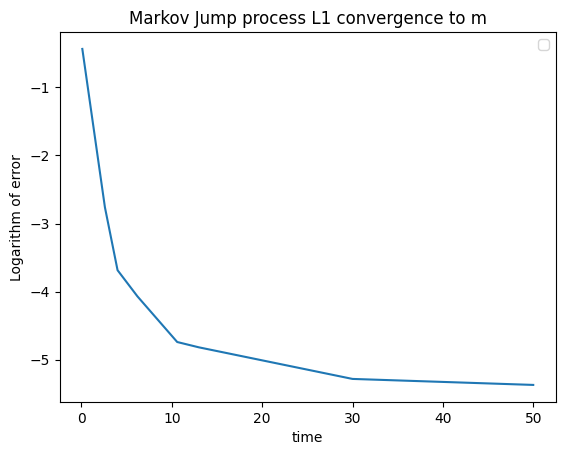

In [ ]:
## Illustration of the exponential convergence

def vector_ln_err(vect_T):
    Err=[]

    for T in vect_T:
        #sum of absolute errors of transition probabilities P_t(x,y) and the stationary probability m(y)
        err_curr= np.abs(monte_carlo_prob(Q(rho_cr),Q(rho_cr)/2,2,2,2,T,10000,42)[0]-m(2,2)) + np.abs(monte_carlo_prob(Q(rho_cr),Q(rho_cr)/2,2,2,1,T,10000,42)[0]-m(1,2)) + np.abs(monte_carlo_prob(Q(rho_cr),Q(rho_cr)/2,2,2,0,T,10000,42)[0]-m(0,2))
        #we sum the error terms for all values of n=0,1,2
        Err.append(np.log(err_curr))
    return Err

vect_T=[0.1,2.6,4,6.2,10.6,13,30,50]#Create an array to find the errors for the global times in the array
error=vector_ln_err(vect_T)
plt.xlabel("time")
plt.ylabel("Logarithm of error")
plt.plot(vect_T, error)
title("Markov Jump process L1 convergence to m")
legend(loc="best")

We observe that the error converges to 0 as the time t goes to infinity.

## REFERENCES

Bodineau, T. (n.d.). Modélisation de phénomènes aléatoires: introduction aux chaînes de Markov et aux martingales. http://www.cmap.polytechnique.fr/~bodineau/MAP432.pdf

Markov Chain Initial Distribution. (n.d.). Mathematics Stack Exchange. https://math.stackexchange.com/questions/566957/markov-chain-initial-distribution

Steady state distribution for Markov pure jump process. (n.d.). Mathematics Stack Exchange. https://math.stackexchange.com/questions/557848/steady-state-distribution-for-markov-pure-jump-process

Wang, Y., & He, Z. (2019). Mesoscopic modelling and analysis of traffic flow based on stationary observations. Procedia Computer Science, 151, 800–807. https://doi.org/10.1016/j.procs.2019.04.109

JANSEN, S. (2020). MARKOV JUMP PROCESSES. https://www.mathematik.uni-muenchen.de/~jansen/jump-processes.pdf

Karlin, S. (2018). Continuous time processes. In Continuous Time Processes. https://web.stanford.edu/class/stat217/Chapter3.pdf

Markov Chain Initial Distribution. (n.d.-b). Mathematics Stack Exchange. https://math.stackexchange.com/questions/566957/markov-chain-initial-distribution

Pardoux, É. (2006). Processus de Markov et applications (Vol. 2, pp. 11–333). https://www.association-tremplin.org/Documents/Eleves/Apres/CoursChainedeMarkovM1Pardoux.pdf

Tordeux, A., Michel ROUSSIGNOL, Sylvain LASSARRE, & UNIVERSITÄT ZU KÖLN, INSTITUT FÜR THEORETISCHE PHYSIK. (2010). Traffic flow models by Markovian jump process. https://www.vzu.uni-wuppertal.de/fileadmin/site/vzu/Presentation_-_Institute_for_Theoretical_Physics.pdf

Rey, C., Bansaye V., Lecture Notes. Processus Markov & Applications [MAP566B]